In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# pip install fuzzy_c_means -qq

In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from fcmeans import FCM

In [4]:
iris = load_iris()

X = iris.data
y = iris.target

In [5]:
fcm = FCM(n_clusters=5)
fcm.fit(X)
center = fcm.centers

In [6]:
pred = fcm.predict(X)

cols = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width']
X = pd.DataFrame(X, columns=cols)
X['cluster'] = pred

In [7]:
data = X.copy(deep=True)

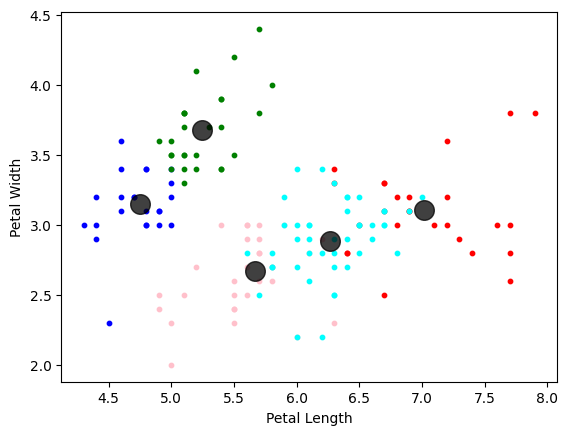

In [8]:
plt.scatter(data.loc[pred == 0, 'Petal Length'], data.loc[pred == 0, 'Petal Width'], s=10, c='r')
plt.scatter(data.loc[pred == 1, 'Petal Length'], data.loc[pred == 1, 'Petal Width'], s=10, c='b')
plt.scatter(data.loc[pred == 2, 'Petal Length'], data.loc[pred == 2, 'Petal Width'], s=10, c='g')
plt.scatter(data.loc[pred == 3, 'Petal Length'], data.loc[pred == 3, 'Petal Width'], s=10, c='pink')
plt.scatter(data.loc[pred == 4, 'Petal Length'], data.loc[pred == 4, 'Petal Width'], s=10, c='aqua')

plt.scatter(center[:, 0], center[:, 1], c='black', s=200, alpha=0.75)  # Plotting cluster centers

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()